# Systems Immunogenetics Project

## Buxco Plots

### McWeeney Lab, Oregon Health & Science University

** Authors: Gabrielle Choonoo (choonoo@ohsu.edu) and Michael Mooney (mooneymi@ohsu.edu) **

## Introduction

This contains examples of how to code heatmaps, boxplots, dotplots, and time series plots for Buxco data.

Required Files:
* Buxco Database
* Buxco Annotation file
* This notebook (Buxco_Plots.ipynb): [[Download here]](https://raw.githubusercontent.com/gchoonoo/Buxco_notebook/master/Buxco_Plots.ipynb)
* R Script (utilities_MM.R): [[Download here]](https://raw.githubusercontent.com/gchoonoo/Buxco_notebook/master/utilities_MM.R)
* R Script (Buxco_Plot_Functions.r): [[Download here]](https://raw.githubusercontent.com/gchoonoo/Buxco_notebook/master/Buxco_Plot_Functions.r)

Required R packages:
- `plethy`
- `plyr`
- `R.utils`
- `RColorBrewer`
- `reshape2`
- `IRanges`
- `ggplot2`
- `flux`
- `colorRamps`
- `lattice`

**Note: this notebook can also be downloaded as an R script (only the code blocks seen below will be included): [[Download R script here]](https://raw.githubusercontent.com/gchoonoo/Buxco_notebook/master/Buxco_Plots.r)

** All code is available on GitHub: [https://github.com/gchoonoo/Buxco_notebook_plot](https://github.com/gchoonoo/Buxco_notebook_plot) **

# Source functions for plotting

In [3]:
source('utilities_MM.R')

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, as.vector, cbind, colnames,
    do.call, duplicated, eval, evalq, Filter, Find, get, grep, grepl,
    intersect, is.unsorted, lapply, lengths, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unlist, unsplit

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: R.oo
Loading required package: R.methodsS3
R.met

# Heatmap

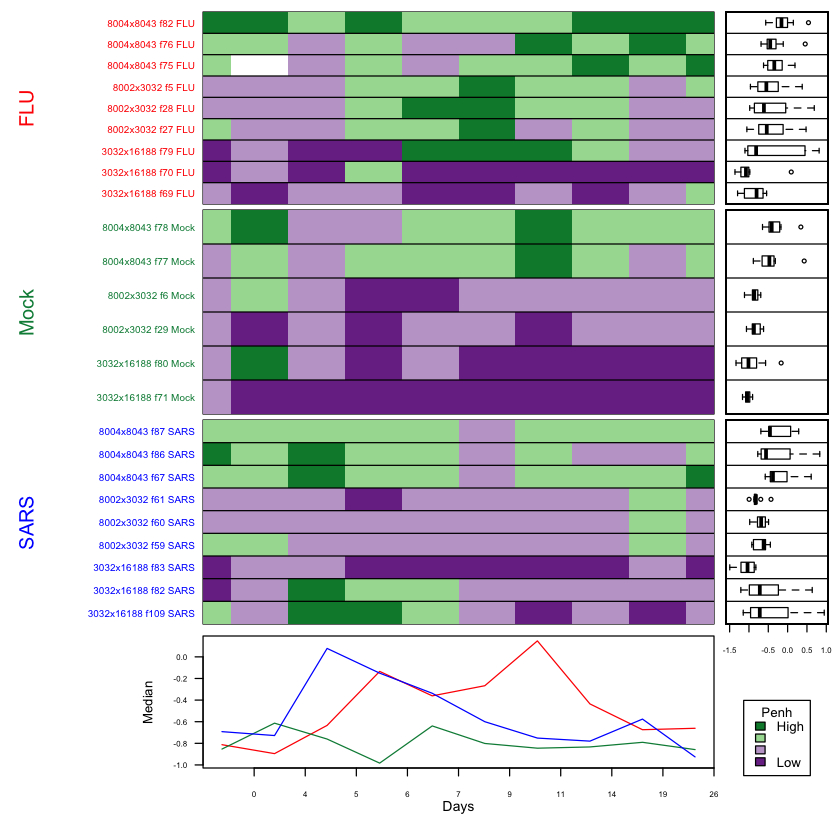

In [8]:
# Read in database
August2013_database.db <- makeBuxcoDB(db.name=file.path("August2013_database.db"))

# Output results for experiment rows only (EXP) and stratify by virus 
# Make sure that the names in outer.cols match the virus labels in the raw data (e.g. SARS vs. sars)

mvtsplot(August2013_database.db, outer.group.name='Virus', outer.cols=c(FLU="red", SARS="blue", Mock="springgreen4"), Break_type_label='EXP')

# Boxplot

[1] "f"     "TVb"   "MVb"   "Penh"  "PAU"   "Rpef"  "Comp"  "PIFb"  "PEFb" 
[10] "Ti"    "Te"    "EF50"  "Tr"    "Tbody" "Tc"    "RH"    "Rinx"

    Break_type_label
Days  EXP
  0  3580
  4  3448
  5  3597
  6  3596
  7  3594
  9  3586
  11 3597
  14 3595
  19 3580
  26 3567

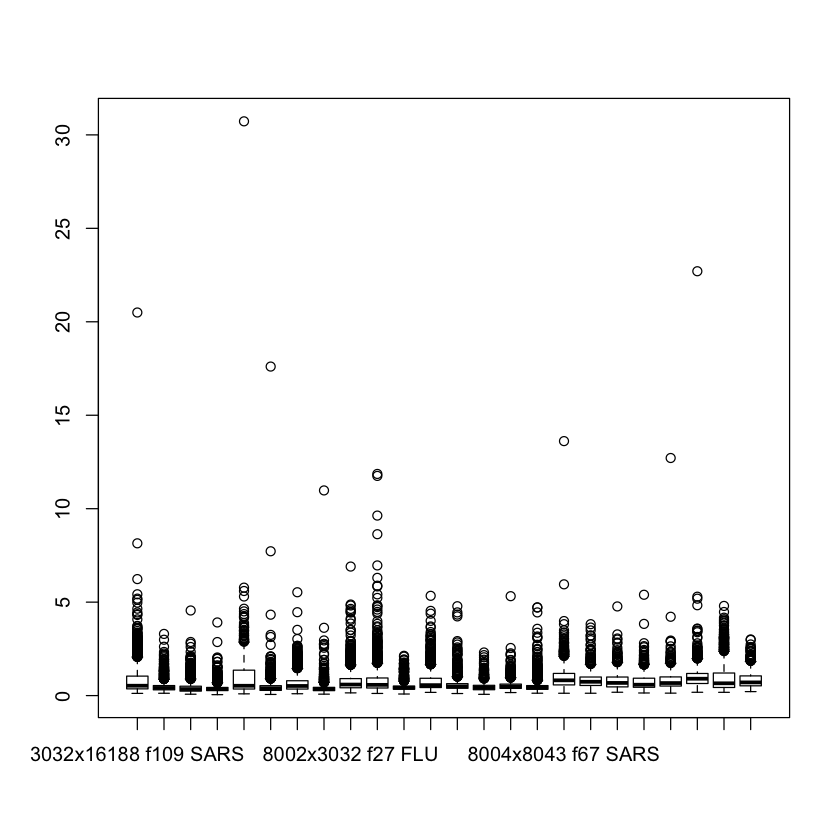

In [9]:
# Observe variables
variables(August2013_database.db)

# Choose the variable and category to visualize
exp.penh <- retrieveData(August2013_database.db, variables="Penh", Break_type_label = 'EXP')

# Get table of categories
with(exp.penh, table(Days, Break_type_label))

# Create Boxplot
boxplot(Value~Sample_Name, data=exp.penh)

# Time Series

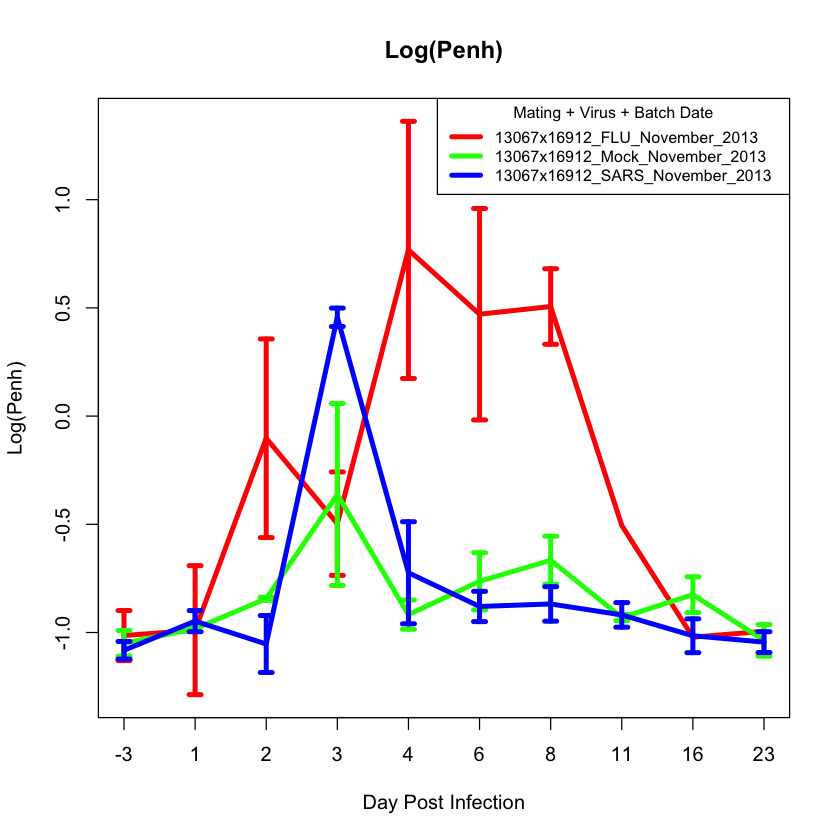

In [2]:
# Source Buxco Plot Functions
source("Buxco_Plot_Functions.r")

# Read in annotation file
read.delim(file="./full_buxco_annotation_auc_v2.txt",header=T,sep="\t",colClasses=c('Sex'='character')) -> buxco_annot

# Create time series plot
buxco_plot(data1=buxco_annot, batch_date="November_2013", mating="13067x16912", var_data="Log(Penh)", virus=c("FLU","SARS","Mock"))

# Dotplot

[1] 1

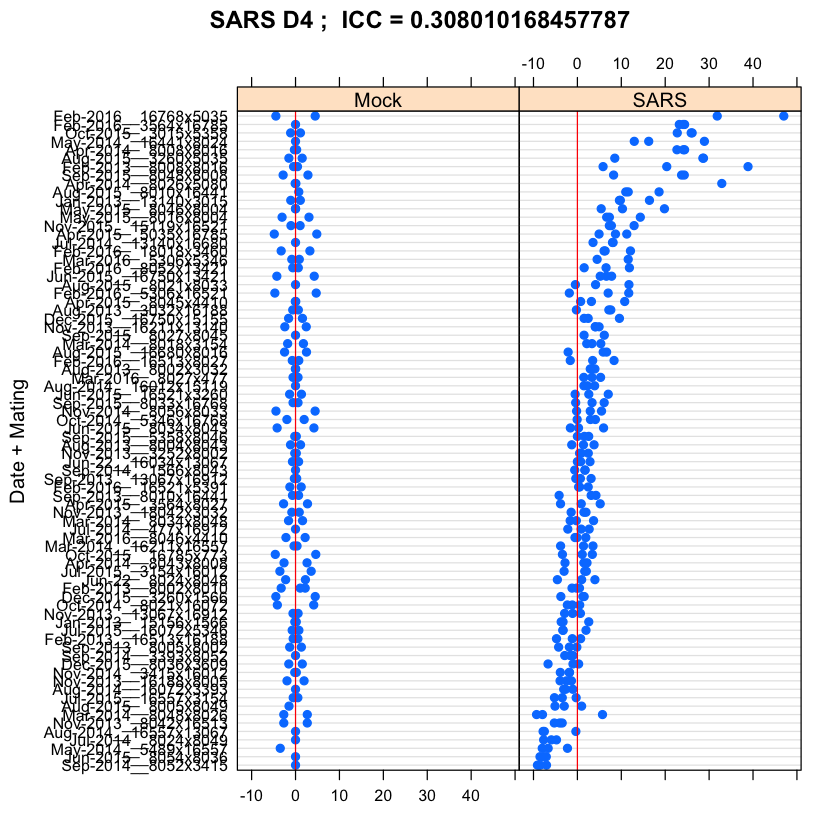

In [3]:
# Set up dot plot data
buxco_dot_plot_data = dot_plot_data(var="Log(Penh)", virus=c("SARS"), lines=unique(buxco_annot$Mating), xlab=NULL, day=4, day_summary=4, vert_line=0)

# Load heritability data
load("buxco_heritability_27-jun-2016.rda")

# Match variable names
all_buxco_herit[which(all_buxco_herit[,"variable"] == "Penh_log"),"variable"] <- "Log(Penh)"

# Create dot plot
dot_plot(buxco_dot_plot_data)